In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
F = len('Jakub')
L = len('Eliasz')
N = (L+F)*100
N

1100

## Excercise 1 - generate data

In [3]:
model_1 = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
model_2 = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:
sim1 = model_1.sample(data={'N': N}, iter_sampling=1,
                     iter_warmup=0,
                     chains=1,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [6]:
sim2 = model_2.sample(data={'N': N}, iter_sampling=1,
                     iter_warmup=0,
                     chains=1,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [7]:
df_1 = sim1.draws_pd()
df_1.head()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1091],y[1092],y[1093],y[1094],y[1095],y[1096],y[1097],y[1098],y[1099],y[1100]
0,0.0,0.0,0.01,-0.424502,-0.063661,-0.833885,1.55158,-0.362245,0.743487,0.970844,...,0.95378,-1.67092,0.064711,-0.175345,-0.704234,-1.20993,-0.49628,-0.384517,-1.55192,-1.67579


In [8]:
df_2 = sim2.draws_pd()
df_2.head()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1091],y[1092],y[1093],y[1094],y[1095],y[1096],y[1097],y[1098],y[1099],y[1100]
0,0.0,0.0,2.70817,0.777181,-1.27227,0.127591,-1.38942,0.246162,1.19873,2.26533,...,-0.549597,4.69989,-1.75485,3.13128,-0.367167,-3.19032,-3.01818,-3.35046,-3.19134,1.27599


In [9]:
ys_1 = df_1.loc[:, 'y[1]': f'y[{N}]']
ys_2 = df_2.loc[:, 'y[1]': f'y[{N}]']

## Excercise 2 - compare normal and student models for data from first file

In [10]:
model_3 = CmdStanModel(stan_file='code_3.stan')
model_4 = CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [11]:
sim3 = model_3.sample(data={'N': N, 'y': ys_1.values.reshape((N,))}, seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [12]:
df_3 = sim3.draws_pd()
df_3.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1091],y_hat[1092],y_hat[1093],y_hat[1094],y_hat[1095],y_hat[1096],y_hat[1097],y_hat[1098],y_hat[1099],y_hat[1100]
0,-1993.98,0.923146,0.915976,3.0,7.0,0.0,1995.51,1.51859,0.199178,-1.42106,...,0.487424,0.615120,-0.066758,-0.468641,2.070890,0.540593,0.720968,2.774820,-1.45246,-0.242788
1,-1991.69,0.924807,0.915976,2.0,3.0,0.0,1995.01,1.48855,0.156454,-1.39290,...,0.134353,0.816215,1.216390,-0.545709,-0.992899,0.237548,-5.069930,-0.576642,-1.04741,0.950809
2,-1991.34,0.990014,0.915976,2.0,3.0,0.0,1992.22,1.51766,0.092244,-1.39407,...,0.237625,-1.088820,-0.141200,1.892500,1.605830,0.620431,0.604116,-1.147970,3.27534,1.686660
3,-1991.47,0.719987,0.915976,2.0,3.0,0.0,1994.57,1.47373,0.147804,-1.38214,...,1.586930,3.389420,-1.914440,-3.271610,0.539246,0.581264,0.032482,-0.977523,1.99093,0.219293
4,-1991.32,1.000000,0.915976,2.0,3.0,0.0,1991.82,1.50177,0.135316,-1.39506,...,2.250800,-2.251390,-0.958161,2.119370,-0.226110,0.032611,-0.392616,0.190696,-0.06839,-1.801840


In [13]:
sim4 = model_4.sample(data={'N': N, 'y': ys_1.values.reshape((N,))}, seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [14]:
df_4 = sim4.draws_pd()
df_4.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1091],y_hat[1092],y_hat[1093],y_hat[1094],y_hat[1095],y_hat[1096],y_hat[1097],y_hat[1098],y_hat[1099],y_hat[1100]
0,-1633.67,1.000000,0.741104,3.0,7.0,0.0,1634.95,0.855834,-0.020117,4.97143,...,-0.012945,-1.45054,0.672722,-0.417047,-2.166760,5.509450,2.098110,0.134317,-0.586334,-1.091910
1,-1634.41,0.815502,0.741104,2.0,3.0,0.0,1636.27,0.822581,-0.043377,4.56481,...,-0.666717,-1.21761,-2.020920,0.973686,0.678113,-0.338797,-0.229188,-0.192398,-2.350950,-1.302670
2,-1633.17,0.992314,0.741104,3.0,7.0,0.0,1635.17,0.869576,0.017165,4.40691,...,0.495871,1.22156,-0.871710,0.027565,-0.697339,-0.166647,-1.012900,-0.243247,0.457924,-1.424500
3,-1633.29,0.989646,0.741104,3.0,7.0,0.0,1634.02,0.800199,0.035092,4.17947,...,-1.118730,0.48007,-2.382930,0.574372,0.898038,-0.179972,0.714656,0.572481,0.130556,-0.370403
4,-1632.62,0.998869,0.741104,3.0,7.0,0.0,1633.71,0.851507,0.032483,4.32417,...,-0.274694,1.87359,1.293300,-1.755940,-0.697700,-1.022930,-0.108341,-0.199078,-0.265378,0.682755


In [15]:
arviz_data1 = az.from_cmdstanpy(posterior=sim3)
arviz_data2 = az.from_cmdstanpy(posterior=sim4)

In [16]:
compare_dict = {"Normal": arviz_data1, "Student": arviz_data2}
difference_loo = az.compare(compare_dict, ic="loo")
difference_loo

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Student,0,-1633.323155,4.641782,0.000000,1.000000e+00,36.716588,0.000000,False,log
Normal,1,-2007.624696,28.747757,374.301541,4.409344e-10,132.376346,106.835922,True,log


<AxesSubplot:xlabel='Log'>

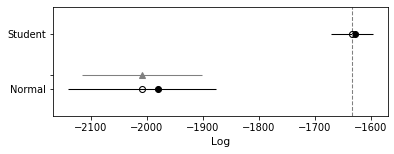

In [17]:
az.plot_compare(difference_loo)

In [18]:
difference_waic = az.compare(compare_dict, ic="waic")
difference_waic

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
Student,0,-1633.306630,4.625258,0.000000,1.0,36.711569,0.000000,True,log
Normal,1,-2008.170878,29.293940,374.864248,0.0,132.655603,107.129773,True,log


<AxesSubplot:xlabel='Log'>

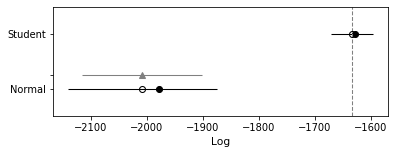

In [19]:
az.plot_compare(difference_waic)

#### Student model have higher log-score - better predictive accuracy.

## Excercise 3 - compare models with different number of predictors

In [20]:
model_5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [21]:
sim5_k1 = model_5.sample(data={'N': N, 'K': 1, 'y': ys_2.values.reshape((N,)), 'X': df_2.loc[:, 'X[1,1]':f'X[{N},1]'].values.reshape((N, 1))}, seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)





chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [22]:
sim5_k2 = model_5.sample(data={'N': N, 'K': 2, 'y': ys_2.values.reshape((N,)), 'X': df_2.loc[:, 'X[1,1]':f'X[{N},2]'].values.reshape((N, 2))}, seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)





chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [23]:
sim5_k3 = model_5.sample(data={'N': N, 'K': 3, 'y': ys_2.values.reshape((N,)), 'X': df_2.loc[:, 'X[1,1]':f'X[{N},3]'].values.reshape((N, 3))}, seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)





chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [24]:
arviz_data1 = az.from_cmdstanpy(posterior=sim5_k1)
arviz_data2 = az.from_cmdstanpy(posterior=sim5_k2)
arviz_data3 = az.from_cmdstanpy(posterior=sim5_k3)

In [25]:
compare_dict = {"k=1": arviz_data1, "k=2": arviz_data2, "k=3": arviz_data3}

In [26]:
difference = az.compare(compare_dict, ic="loo")
difference

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
k=1,0,-2025.191341,1.817018,0.000000,1.000000e+00,22.811226,0.000000,False,log
k=2,1,-2597.073540,2.956229,571.882199,1.613924e-13,22.662283,25.496080,False,log
k=3,2,-2597.836161,3.927841,572.644820,0.000000e+00,22.716183,25.508443,False,log


<AxesSubplot:xlabel='Log'>

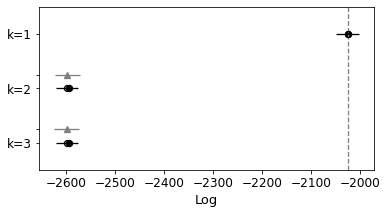

In [27]:
az.plot_compare(difference)

In [28]:
difference = az.compare(compare_dict, ic="waic")
difference

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
k=1,0,-2025.191107,1.816784,0.000000,1.000000e+00,22.811192,0.000000,False,log
k=2,1,-2597.073204,2.955893,571.882097,0.000000e+00,22.662239,25.496051,False,log
k=3,2,-2597.836269,3.927949,572.645162,1.247891e-13,22.716198,25.508421,False,log


<AxesSubplot:xlabel='Log'>

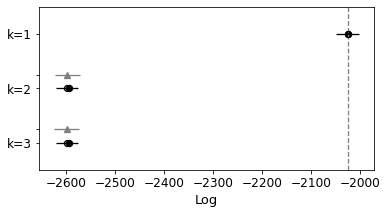

In [29]:
az.plot_compare(difference)